In [1]:
from guided_diffusion_.guided_diffusion.image_datasets import load_data_stain_augmentation
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch as th

In [2]:
def postprocess(image):
    image = ((image + 1) * 127.5).clamp(0, 255).to(th.uint8)
    image = image.permute(0, 2, 3, 1)
    image = image.contiguous().cpu().numpy()
    return image

In [3]:
data = load_data_stain_augmentation(
        data_dir="./data/test/",
        batch_size=1,
        image_size=256,
        class_cond=False,
        stain_database_path='./stain_augmentation/new_database_color_variations.pickle',
    )

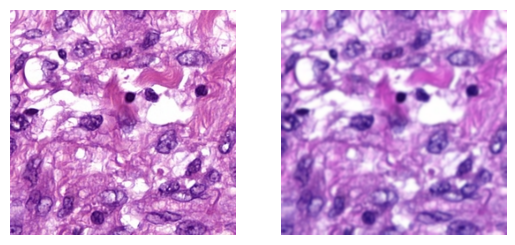

In [5]:
batch_image, batch_HE, cond = next(data)

plt.figure()
plt.subplot(121),plt.imshow(postprocess(batch_image)[0]),plt.axis('off')
plt.subplot(122),plt.imshow(postprocess(batch_HE)[0]),plt.axis('off')
plt.show()
